<a href="https://colab.research.google.com/github/SachinthaniManthilaka/clustering-dataset/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
data = df.head()
print(data)


Saving Mall_Customers.csv to Mall_Customers (2).csv
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:


# Quick overview
print(df.shape)       # rows, columns
print(df.info())      # data types + non-null counts
print(df.head())      # first few rows


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:

# Count missing values per column
missing_counts = df.isnull().sum()

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by="Missing %", ascending=False)

print(missing_summary)


                        Missing Count  Missing %
CustomerID                          0        0.0
Genre                               0        0.0
Age                                 0        0.0
Annual Income (k$)                  0        0.0
Spending Score (1-100)              0        0.0


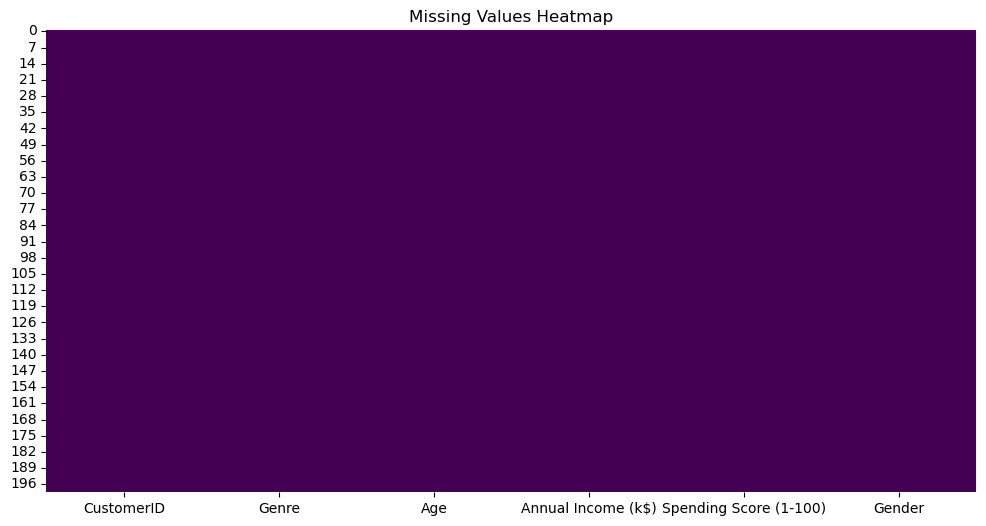

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
df_clean = df.dropna()  # drop rows with any missing values


In [ ]:
# Example: fill numerical with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Example: fill categorical with mode
df['Gender'] = df['Genre'].fillna(df['Genre'].mode()[0])


In [ ]:
# Check again after cleaning
print(df.isnull().sum())


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Select pertinent parameters
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print(X.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [13]:
# Select pertinent features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas if not already imported in this cell's scope

# Select pertinent features - this line was missing or not executed previously
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])

print(X_scaled_df.head())

   Annual Income (scaled)  Spending Score (scaled)
0               -1.738999                -0.434801
1               -1.738999                 1.195704
2               -1.700830                -1.715913
3               -1.700830                 1.040418
4               -1.662660                -0.395980


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


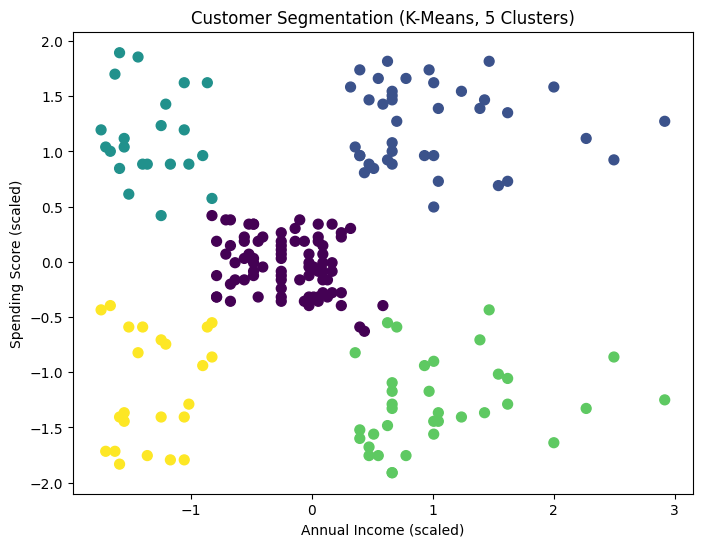

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Select pertinent features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Select pertinent features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Preview results
print(df.head())

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.title("Customer Segmentation (K-Means, 5 Clusters)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()


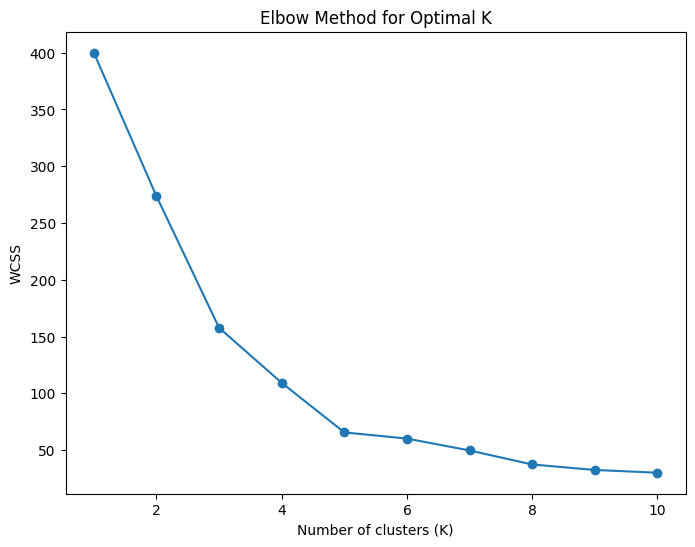

In [18]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)   # inertia_ = WCSS

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


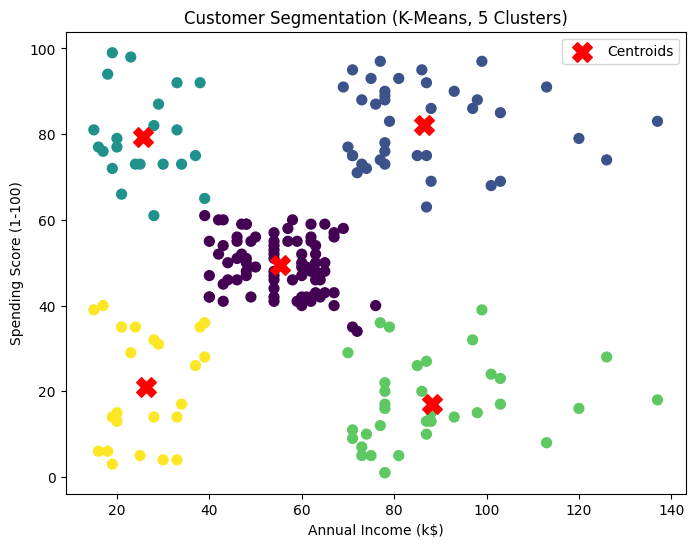

In [19]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

plt.figure(figsize=(8,6))

# Scatter plot of customers colored by cluster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=50)

# Plot centroids (convert back to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('Customer Segmentation (K-Means, 5 Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [20]:
from sklearn.cluster import KMeans
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Mean Annual Income and Spending Score per cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
